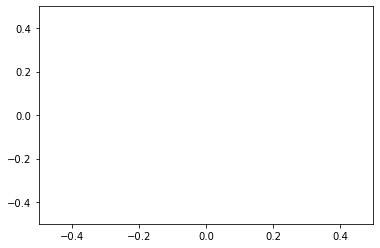

In [3]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

# Set the number of points and the central point
num_points = 50
central_point = (0.5, 0.5)

# Set the size of the square
square_size = 1

# Initialize the points to random positions near the edges of the square
points = []
for i in range(num_points):
    x = random.uniform(-square_size/2, square_size/2)
    y = random.uniform(-square_size/2, square_size/2)
    points.append((x, y))

# Set the movement speed and the number of steps for the simulation
movement_speed = 0.01
num_steps = 100

# Set up the figure and axes
fig, ax = plt.subplots()
scatter, = ax.plot([], [], 'bo', markersize=5)

# Set the axis limits
ax.set_xlim(-square_size/2, square_size/2)
ax.set_ylim(-square_size/2, square_size/2)

# This function will be called by FuncAnimation to update the plot
def update(num):
    global points
    
    # Move each point towards the central point
    for j in range(len(points)):
        x, y = points[j]
        x_diff = central_point[0] - x
        y_diff = central_point[1] - y
        x += x_diff * movement_speed
        y += y_diff * movement_speed
        points[j] = (x, y)
    
    # Remove points that have reached the central point
    points = [point for point in points if point != central_point]
    
    # Add new points to the list
    for j in range(num_points - len(points)):
        x = random.uniform(-square_size/2, square_size/2)
        y = random.uniform(-square_size/2, square_size/2)
        points.append((x, y))
    
    # Update the data for the scatter plot
    x_coords, y_coords = zip(*points)
    scatter.set_data(x_coords, y_coords)

# Create the FuncAnimation object
animation = FuncAnimation(fig, update, frames=range(num_steps), interval=50)

plt.show()
